In [3]:
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input/hivaids-yearly-statistics-in-hong-kong'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hivaids-yearly-statistics-in-hong-kong/dh-spp-hiv-aids-1984-to-2022-yearly-figures-eng.csv


In [43]:
hivaids = pd.read_csv("/kaggle/input/hivaids-yearly-statistics-in-hong-kong/dh-spp-hiv-aids-1984-to-2022-yearly-figures-eng.csv")

In [44]:
hivaids

,Year,Sex/Male,Sex/Female,Ethnicity/Chinese,Ethnicity/Non-Chinese,Ethnicity/Unknown,Route of Transmission/Heterosexual,Route of Transmission/Homosexual,Route of Transmission/Bisexual,Route of Transmission/Injecting drug use,Route of Transmission/Blood/blood products recipients,Route of Transmission/Perinatal,Route of Transmission/Undetermined,Total
0,1984/HIV,7,0,7,0,0,1,1,0,0,5,0,0,7
1,1984/AIDS,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1985/HIV,46,0,39,6,1,0,10,1,1,32,0,2,46
3,1985/AIDS,3,0,2,1,0,1,1,1,0,0,0,0,3
4,1986/HIV,18,2,13,6,1,0,6,2,0,10,0,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2021/AIDS,76,14,71,19,0,37,34,15,1,0,0,3,90
76,2022/HIV,341,68,272,74,63,107,185,37,2,1,0,77,409
77,2022/AIDS,47,15,45,17,0,28,23,4,0,1,0,6,62
78,1984 - 2022/HIV Cumulative,9541,2100,8106,3154,381,3746,4858,688,375,86,35,1853,11641


In [45]:
hivaids = hivaids[["Sex/Male", "Sex/Female", "Route of Transmission/Heterosexual", "Route of Transmission/Homosexual", "Route of Transmission/Bisexual", "Total"]]

In [46]:
hivaids

,Sex/Male,Sex/Female,Route of Transmission/Heterosexual,Route of Transmission/Homosexual,Route of Transmission/Bisexual,Total
0,7,0,1,1,0,7
1,0,0,0,0,0,0
2,46,0,0,10,1,46
3,3,0,1,1,1,3
4,18,2,0,6,2,20
...,...,...,...,...,...,...
75,76,14,37,34,15,90
76,341,68,107,185,37,409
77,47,15,28,23,4,62
78,9541,2100,3746,4858,688,11641


In [12]:
import seaborn as sns

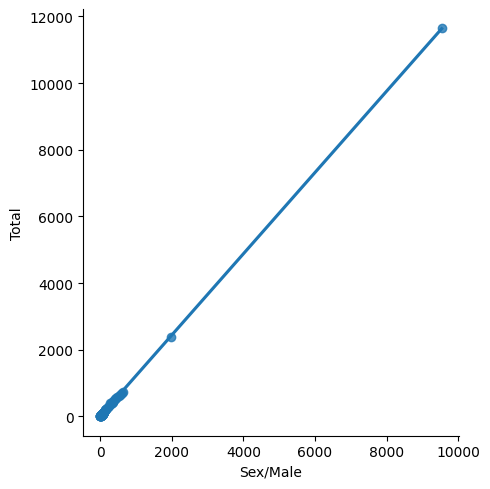

In [14]:
sns.lmplot(x="Sex/Male", y="Total", data=hivaids, fit_reg=True, ci=None)

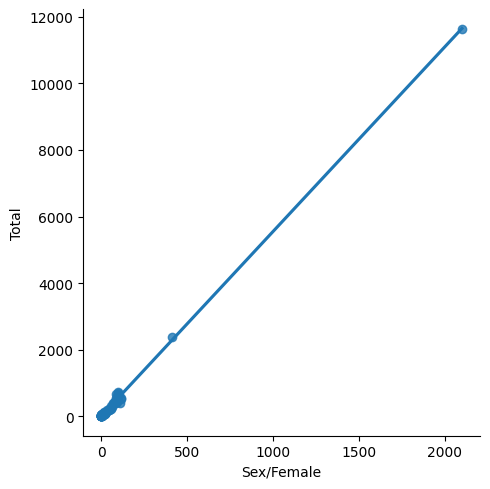

In [15]:
sns.lmplot(x="Sex/Female", y="Total", data=hivaids, fit_reg=True, ci=None)

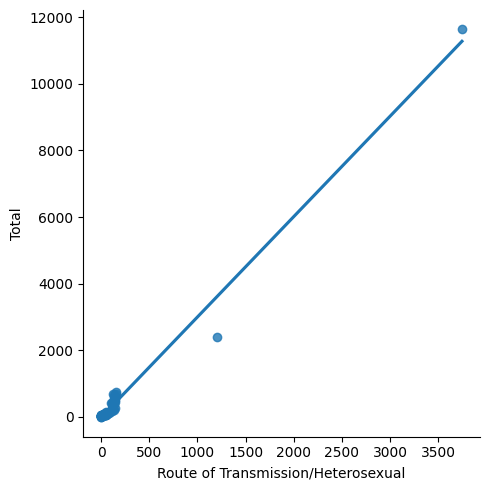

In [18]:
sns.lmplot(x="Route of Transmission/Heterosexual", y="Total", data=hivaids, fit_reg=True, ci=None)

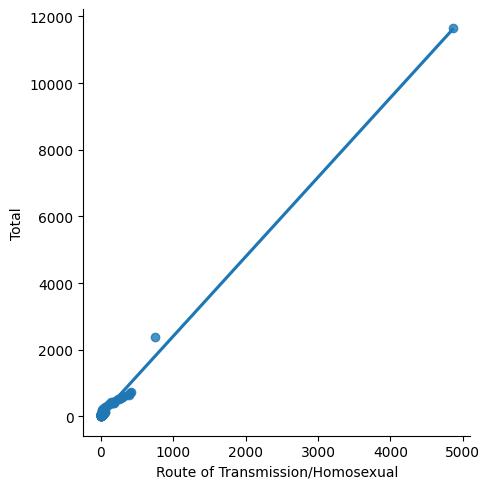

In [19]:
sns.lmplot(x="Route of Transmission/Homosexual", y="Total", data=hivaids, fit_reg=True, ci=None)

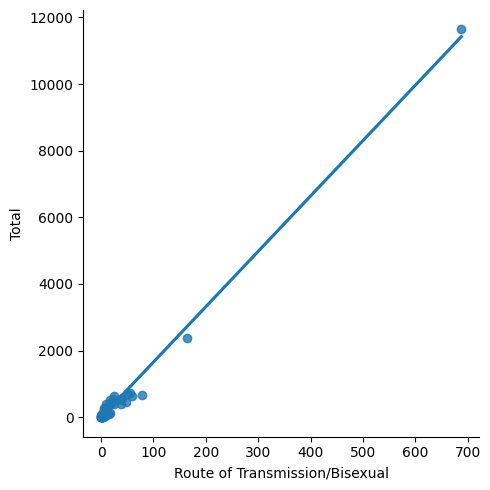

In [21]:
sns.lmplot(x="Route of Transmission/Bisexual", y="Total", data=hivaids, fit_reg=True, ci=None)

<Axes: ylabel='Frequency'>

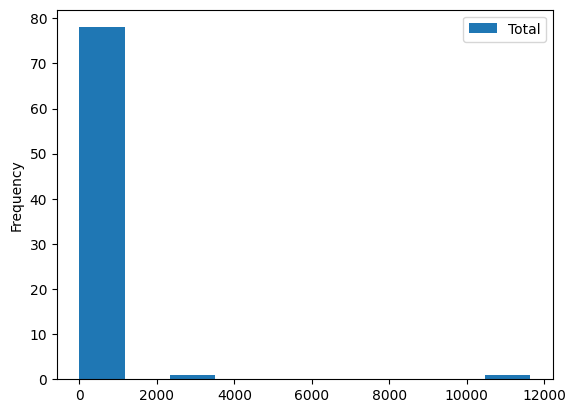

In [20]:
hivaids.plot.hist(y="Total")

<Axes: ylabel='Frequency'>

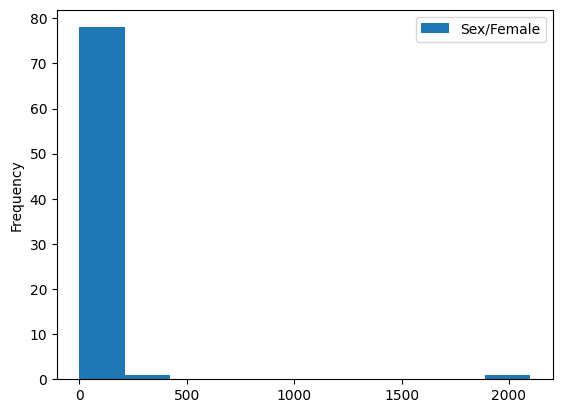

In [22]:
hivaids.plot.hist(y="Sex/Female")

In [47]:
hivaids[hivaids.isnull().any(axis=1)]

,Sex/Male,Sex/Female,Route of Transmission/Heterosexual,Route of Transmission/Homosexual,Route of Transmission/Bisexual,Total


In [48]:
import numpy as np
from sklearn.model_selection import train_test_split

In [99]:
# Features (X) and target (y)
X = hivaids.drop(columns=['Total'])  # Features (exclude target)
y = hivaids['Total']  # Target column

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [107]:
print(X_train.shape)

(64, 6)


In [108]:
print(X_test.shape)

(16, 6)


In [109]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [110]:
#fit model on train
reg.fit(X_train, y_train)

LinearRegression()

In [111]:
#predict 
y_pred = reg.predict(X_test)

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

In [113]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R² score
r2 = r2_score(y_test, y_pred)
print(f"R² score: {r2}")

Mean Squared Error: 8.481881756742895e-27
R² score: 1.0
